# ***Inroduction***



---



The Titanic dataset is one of the most well-known datasets in the field of data science and machine learning. It contains information about the passengers aboard the RMS Titanic, which tragically sank on its maiden voyage in 1912 after colliding with an iceberg. The dataset is often used to predict passenger survival based on various features such as age, gender, and fare.


## **Importing Libraries**

In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## **Read Titanic Dataset csv file**




In [115]:
df = pd.read_csv("sample_data/Titanic-Dataset.csv")

## **Data Exploration**

In [116]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [119]:
df.duplicated().sum()

0

## **Feature Selection**

We don't need **PassengerId**,**Ticket** and **Name** columns in our model, because they don't have any relationships with our target **Survived**, So practiclly we are going to **drop** them from our *Dataframe*

In [120]:
df.drop(["PassengerId","Ticket","Name"],axis=1,inplace=True)

## **Data Cleaning**

In [121]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


The column **Cabin** has often the most of null values in the Dataframe (**687 null values**) comparing to other columns, and it has **147** distinct categorical values, so actually it doesn't represent any crucial value to our model

In [122]:
df.value_counts("Cabin")

,count
Cabin,
C23 C25 C27,4
G6,4
B96 B98,4
F2,3
C22 C26,3
...,...
C101,1
B94,1
B86,1


In [123]:
df.drop(["Cabin"],axis=1,inplace=True)

In [124]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


***Embarked*** column has **2 null values** So we are going to drop the rows corresponding to those null values



In [125]:
df.dropna(subset=["Embarked"],inplace=True)

In [126]:
mean_age = df["Age"].mean()
df["Age"]=df["Age"].fillna(mean_age)

### **Handling Outliers**

Outliers are data points that significantly differ from other observations in a dataset. They are observations that lie an abnormal distance from other values in a random sample from a population. Outliers can distort the results of our model and the scale of graphs, making it difficult to interpret the data.

We can see numerical features which has outliers data points easly in the boxplot

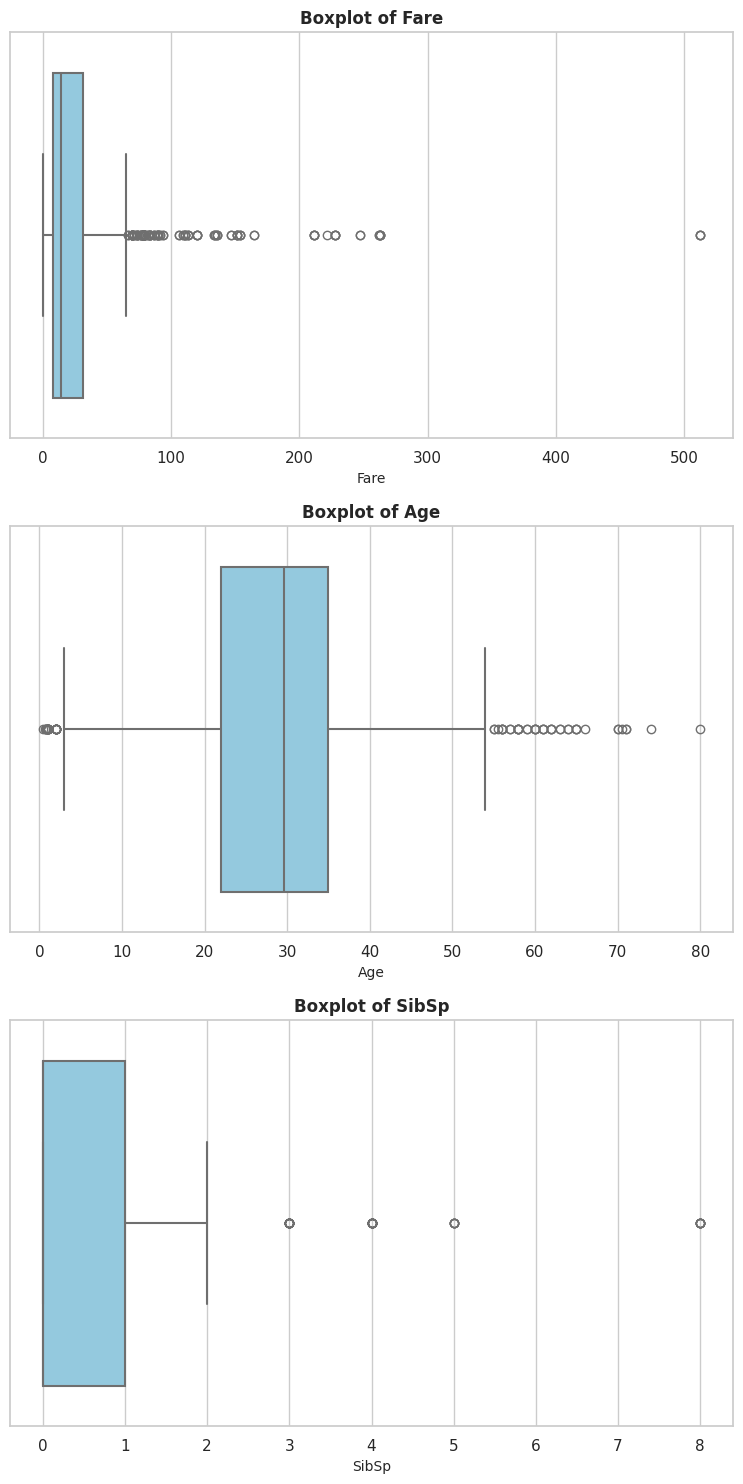

In [127]:
sns.set_theme(style="whitegrid", palette="pastel")
numerical_columns = ["Fare","Age","SibSp"]
plt.figure(figsize=(15, 15))

for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 2, 2 * i + 1)
    sns.boxplot(df[col], orient='h', color="skyblue", linewidth=1.5)
    plt.title(f"Boxplot of {col}", fontsize=12, fontweight="bold")
    plt.xlabel(col, fontsize=10)

plt.tight_layout()
plt.show()

### We can simply avoid outliers problem by replacing outlier values by **wiskers**, each column has **lower wisker** and **upper wisker** to replace outliers values in the both sides

In [128]:
def wisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

In [129]:
for i in numerical_columns:
    lw, uw = wisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])

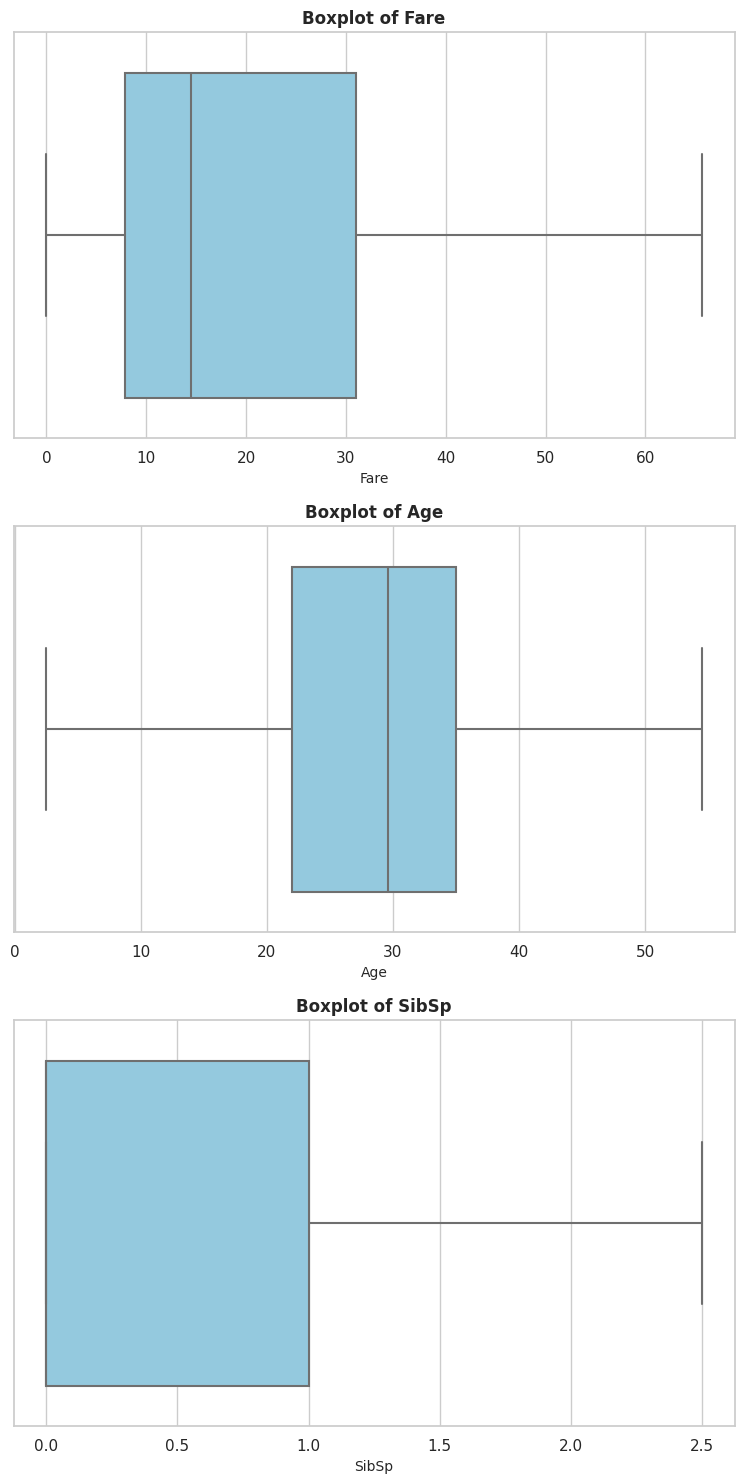

In [130]:
sns.set_theme(style="whitegrid", palette="pastel")
numerical_columns = ["Fare","Age","SibSp"]
plt.figure(figsize=(15, 15))

for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 2, 2 * i + 1)
    sns.boxplot(df[col], orient='h', color="skyblue", linewidth=1.5)
    plt.title(f"Boxplot of {col}", fontsize=12, fontweight="bold")
    plt.xlabel(col, fontsize=10)

plt.tight_layout()
plt.show()

### ***Now our boxplot looks better***

In [131]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1.0,0,7.2500,S
1,1,1,female,38.000000,1.0,0,65.6563,C
2,1,3,female,26.000000,0.0,0,7.9250,S
3,1,1,female,35.000000,1.0,0,53.1000,S
4,0,3,male,35.000000,0.0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0.0,0,13.0000,S
887,1,1,female,19.000000,0.0,0,30.0000,S
888,0,3,female,29.642093,1.0,2,23.4500,S
889,1,1,male,26.000000,0.0,0,30.0000,C


For the **Data Visualisation** please have look at the report uploaded in the same repository

## **Separating the Data into features Dataframe and target Serie**

In [132]:
X = df.drop(["Survived"],axis=1)
y = df["Survived"]

In [133]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1.0,0,7.2500,S
1,1,female,38.000000,1.0,0,65.6563,C
2,3,female,26.000000,0.0,0,7.9250,S
3,1,female,35.000000,1.0,0,53.1000,S
4,3,male,35.000000,0.0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0.0,0,13.0000,S
887,1,female,19.000000,0.0,0,30.0000,S
888,3,female,29.642093,1.0,2,23.4500,S
889,1,male,26.000000,0.0,0,30.0000,C


In [134]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


## **Handling Categorical Columns**

In [135]:
encoder = LabelEncoder()
X["Sex"] = encoder.fit_transform(df["Sex"])
X["Embarked"] = encoder.fit_transform(df["Embarked"])

In [136]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1.0,0,7.2500,2
1,1,0,38.000000,1.0,0,65.6563,0
2,3,0,26.000000,0.0,0,7.9250,2
3,1,0,35.000000,1.0,0,53.1000,2
4,3,1,35.000000,0.0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0.0,0,13.0000,2
887,1,0,19.000000,0.0,0,30.0000,2
888,3,0,29.642093,1.0,2,23.4500,2
889,1,1,26.000000,0.0,0,30.0000,0


## **Preparing the training and evaluation data**

In [137]:
X_train,X_eval,y_train,y_eval = train_test_split(X,y,test_size=0.2,random_state=42)

## **Creating the model**

In [138]:
classifier = LogisticRegression()

## **Training The model**

In [139]:
classifier.fit(X_train,y_train)

LogisticRegression()

## **Make Predictions**

In [140]:
y_pred = classifier.predict(X_eval)

## **Model Evaluation**

In [155]:
accuracy = accuracy_score(y_eval,y_pred)
print(f"Accuracy: {accuracy*100: .0f}%")


Accuracy:  80%


In [142]:
X_eval

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
281,3,1,28.0,0.0,0,7.8542,2
435,1,0,14.0,1.0,2,65.6563,2
39,3,0,14.0,1.0,0,11.2417,0
418,2,1,30.0,0.0,0,13.0000,2
585,1,0,18.0,0.0,2,65.6563,2
...,...,...,...,...,...,...,...
433,3,1,17.0,0.0,0,7.1250,2
807,3,0,18.0,0.0,0,7.7750,2
25,3,0,38.0,1.0,5,31.3875,2
85,3,0,33.0,2.5,0,15.8500,2


In [143]:
df.loc[418]

,418
Survived,0
Pclass,2
Sex,male
Age,30.0
SibSp,0.0
Parch,0
Fare,13.0
Embarked,S


In [144]:
x = X.loc[418]
classifier.predict([x])[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0

In [145]:

new_passenger = pd.DataFrame({
    'Pclass': [3],
    'Sex': [0],
    'Age': [25],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [7.2500],
    'Embarked': [2]
})

prediction = classifier.predict(new_passenger)
print(f"Prediction for the new passenger: {prediction[0]}")

if(new_passenger["Sex"].loc[0]==1):
    print("He will",end=" ")
else :
    print("She will",end=" ")

if(prediction[0]) :
    print("Survive")
else:
    print("not Survive")





Prediction for the new passenger: 1
She will Survive


## **Building k-Nearest Neighbors classifier (KNN)**

In [146]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_eval)
accuracy = accuracy_score(y_eval,y_pred)
print(f"Accuracy : {accuracy*100: .0f}%")

Accuracy :  72%


## **Building Support Vector Machine Classifier Model (SVM)**

In [147]:
svm_model = SVC(kernel='linear', random_state=42)

In [148]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [149]:
y_pred = svm_model.predict(X_eval)

In [150]:
accuracy = accuracy_score(y_eval,y_pred)
print(f"Accuracy: {accuracy*100: .0f}%")

Accuracy:  80%


# ***Conclusion***



---



I evaluated three models: **Logistic Regression**, **Support Vector Machine Classifier** and **k-Nearest Neighbors classifier**. With Logistic and SVC having similar results: an accuracy of about **80%**, meaning they predict correctly **80%** of the testing set. KNN performed slightly worse, with an accuracy of **72%**, due to its feature comparing process. Overall, the models performed well, with Logistic and SVM classifier being the best in this case.





# **END**



---

